#### Implementação do K-Means

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
#Load Data

# url = "lib/drybean/Dry_Bean_Dataset.xlsx"
url = 'https://docs.google.com/spreadsheets/d/1N-KOihE3XDDfHEsaj8dt9-y8jrVOv8wB/edit?usp=sharing&ouid=102198786401215745194&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# loading dataset into Pandas DataFrame
df = pd.read_excel(path, engine = 'openpyxl')

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [17]:
# obter apenas os valores 
features = df.columns[:-1] ## Retirada do Resultado                     
x = df.loc[:, features].values

# Normalizar valores 
X = StandardScaler().fit_transform(x) ## Valores Normalizados

pd.DataFrame(data = X, columns = features).head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [10]:
X = x

In [11]:
# PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)

principalDf = pd.DataFrame(data = df
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-35149.923738,-22.086841
1,-34586.321890,58.586565
2,-33764.026291,-38.995373
3,-32586.564121,239.179424
4,-32712.806082,-71.439790


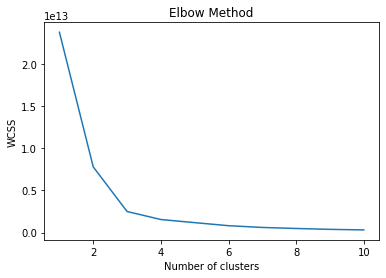

In [12]:
### Método do Elbow para encontrar a quantidade de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=5)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

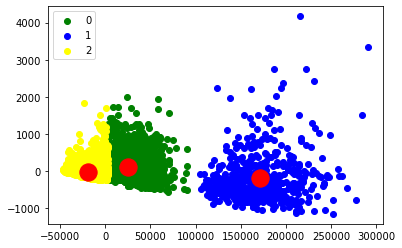

In [15]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

colors = np.array(["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, c=colors[i])

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [14]:
kmeans.cluster_centers_

array([[-1.81331582e+03,  8.55441667e+00],
       [ 1.49568038e+05, -2.39078585e+02],
       [ 4.22481490e+04,  1.01854538e+02],
       [-3.17904737e+04, -1.29611225e+01],
       [ 2.05665515e+04,  1.05413769e+02],
       [-1.74569408e+04, -5.00776176e+01],
       [ 2.03052403e+05, -1.00364198e+02]])